# Importing all needed libraries

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import Recommenders
from file_functions import load_dataset

# Downloading datasets

**For the first time, the function can take a long time, since it needs to download two large enough datasets.**

We check that the data files are downloaded, if not downloaded, then and saved to a file, if downloaded, then just read from the file.

We are using https://static.turi.com/datasets/millionsong/10000.txt set, as it is a subset of a million set of songs. Million songs set holds more than 600 GB of data, while its subset takes up far less. Also, to get more information about songs, we are using https://static.turi.com/datasets/millionsong/song_data.csv. With this set, we have a song name, artist name, and album name — all other things we don't need, as we don't make a deep analysis of the song.

In [3]:
songs = load_dataset('./data', 'https://static.turi.com/datasets/millionsong/10000.txt', 'https://static.turi.com/datasets/millionsong/song_data.csv', 'song.csv')

# Data analysis and simple data preprocessing

## Basic analysis

In [4]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


We drop all None values from the dataset.

We output the number of empty values before deleting them because, after that, they will be removed from the dataset, so that we will receive zeros.

In [5]:
print(songs.isnull().sum())
songs.dropna(inplace=True)

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64


In [6]:
songs.describe()

,listen_count,year
count,2.000000e+06,2.000000e+06
mean,3.045485e+00,1.628645e+03
std,6.579720e+00,7.787283e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.984000e+03
50%,1.000000e+00,2.002000e+03
75%,3.000000e+00,2.007000e+03
max,2.213000e+03,2.010000e+03


In [7]:
songs.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year'],
      dtype='object')

# Basic preprocess of data

We are adding a couple of new columns to our datasheet, as we want to save the past columns so that we can list the song names in the end.

This couple of columns is encoded columns of user id song id, album name and artist_name. We change user_id to our encoded user_id, as it is coded in start dataset, so that it wouldn't give us any information.

In [8]:
le = LabelEncoder()
songs['user_id'] = le.fit_transform(songs['user_id'])
songs['year'] = pd.to_numeric(songs['year'])
songs['song_id'] = le.fit_transform(songs['song_id'])
songs['encoded_artist_name'] = le.fit_transform(songs['artist_name'])
songs['encoded_release'] = le.fit_transform(songs['release'])
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year,encoded_artist_name,encoded_release
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0,1370,4810
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,2239,1548
2,54961,736,1,Stronger,Graduation,Kanye West,2007,1577,1753
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005,1370,2113
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1115,4794


## Advanced data analysis

### Top 10 most popular songs

Firstly, we group our dataset by song_id and then sum it, to get result count of listen. Then we sorting this and get first 10 rows.

In [8]:
songs.groupby("song_id").sum().sort_values("listen_count", ascending=False).head(10)

,user_id,listen_count,year,encoded_artist_name,encoded_release
song_id,,,,,
614,244725879,54136,12759880,5860568,13445964
317,267383552,49253,14071032,2426040,35842104
7416,236072986,41418,12339160,10145395,19565680
1664,207999124,31153,0,1389330,15492645
2220,315627938,31036,0,10520067,24201948
352,266230118,26663,0,7692543,21437665
5531,222122778,22100,11734569,12879405,30063627
6246,133923369,21019,0,3860970,15651914
7913,111995376,19645,5779774,9203756,4350709


1
The Cove Jack Johnson
2
1
Entre Dos Aguas Paco De Lucia
2
1
Stronger Kanye West
2
1
Constellations Jack Johnson
2
1
Learn To Fly Foo Fighters
2
1
Apuesta Por El Rock 'N' Roll Héroes del Silencio
2
1
Paper Gangsta Lady GaGa
2
1
Stacked Actors Foo Fighters
2
1
Sehr kosmisch Harmonia
2
1
Heaven's gonna burn your eyes Thievery Corporation feat. Emiliana Torrini
2
1
Let It Be Sung Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
2
1
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) Puff Daddy
2
1
Love Shack The B-52's
2
1
Clarity John Mayer
2
1
I?'m A Steady Rollin? Man Robert Johnson
2
1
The Old Saloon The Lonely Island
2
1
Behind The Sea [Live In Chicago] Panic At The Disco
2
1
Champion Kanye West
2
1
Breakout Foo Fighters
2
1
Ragged Wood Fleet Foxes
2
1
Mykonos Fleet Foxes
2
1
Country Road Jack Johnson / Paula Fuga
2
1
Oh No Andrew Bird
2
1
Love Song For No One John Mayer
2
1
Jewels And Gold Angus & Julia Stone
2
1
Warning Incubus
2
1
83 John Mayer
2
1


1
Money Straight (Explicit Album Version) Plies
2
1
Elephant Gun Beirut
2
1
Annihilation By The Hands Of God (Album Version) Roadrunner United
2
1
Catch You Baby (Steve Pitron & Max Sanna Radio Edit) Lonnie Gordon
2
1
Why Worry The All-American Rejects
2
1
If It's Lovin' That You Want Rihanna
2
1
Three Peaches Neutral Milk Hotel
2
1
It's Only Divine Right The New Pornographers
2
1
Bling (Confession Of A King) The Killers
2
1
The Hazards Of Love 4 (The Drowned) The Decemberists
2
1
You're A Cad the bird and the bee
2
1
The Penalty Beirut
2
1
I'm A Cuckoo Belle & Sebastian
2
1
Baby the bird and the bee
2
1
Ice Dogs Man Man
2
1
What's In The Middle the bird and the bee
2
1
Poster Of A Girl Metric
2
1
Head Rolls Off Frightened Rabbit
2
1
The Greys Frightened Rabbit
2
1
Innocent When You Dream (78) Tom Waits
2
1
What Is It About Men Amy Winehouse
2
1
The Fake Headlines The New Pornographers
2
1
Red Socks Pugie Foals
2
1
Black Wave (Album) The Shins
2
1
Against The Peruvian Monster Man Man
2

1
Slush Hot Chip
2
1
Waters Of Nazareth (album version) Justice
2
1
Life In Technicolor ii Coldplay
2
1
Tenderoni (Radio edit) Chromeo
2
1
Alkime Soulive
2
1
A Dream Cut Copy
2
1
Yes_ I Don't Want This Digitalism
2
1
Around The World (Radio Edit) Daft Punk
2
1
Doperide Saliva
2
1
Leila Came Around And We Watched A Video Four Tet
2
1
Smile To Shine Down To The Bone featuring Hil St. Soul
2
1
Lies The Black Keys
2
1
Glass Of Water Coldplay
2
1
A Whisper Coldplay
2
1
Daft Punk Is Playing At My House LCD Soundsystem
2
1
Easy Love MSTRKRFT
2
1
One One One Hot Chip
2
1
Momma's Boy Chromeo
2
1
Exit Counselor Octopus Project
2
1
Things Ain't Like They Used To Be The Black Keys
2
1
Evil Thing Melody Club
2
1
All Of The Champs That Ever Lived Octopus Project
2
1
Hypnopaedia Octopus Project
2
1
Orbit Brazil Flying Lotus
2
1
Peaceful Valley Ryan Adams & The Cardinals
2
1
The Battery Boys Noize
2
1
Sinister Kid The Black Keys
2
1
One Life Stand Hot Chip
2
1
Tonight Jonas Brothers
2
1
I Remember Dea

1
The Warning Hot Chip
2
1
All The Kings Horns Sufjan Stevens
2
1
Never As Tired As When I'm Waking Up LCD Soundsystem
2
1
You Could Ruin My Day Four Tet
2
1
Trouble Coldplay
2
1
Swing_ Swing The All-American Rejects
2
1
The Adjustor Octopus Project
2
1
My Angel Rocks Back And Forth Four Tet
2
1
Short Circuit Daft Punk
2
1
The Joker Fatboy Slim
2
1
Plastic People Four Tet
2
1
I'll Try Anything Once The Strokes
2
1
Alive Daft Punk
2
1
Forest Families The Knife
2
1
42 Coldplay
2
1
Golden Mummy Golden Bird Horse The Band
2
1
Disco Infiltrator (FK's Infiltrated Vocal) LCD Soundsystem
2
1
I Feel For You Stefan Schrom
2
1
For You Coldplay
2
1
Aerodynamic (Slum Village Remix) Daft Punk
2
1
Watch The Tapes LCD Soundsystem
2
1
Sunset (Bird Of Prey) Fatboy Slim
2
1
Angel From Montgomery Bonnie Raitt
2
1
Three Days (2006 Remastered Album Version) Jane's Addiction
2
1
Stop (2006 Remastered Album Version) Jane's Addiction
2
1
I Thought It Was You Julia Fordham
2
1
Mountain Song ( LP Version ) Jane'

1
re:stacks Bon Iver
2
1
Superstition The Kills
2
1
Flume Bon Iver
2
1
Manhattan Kings Of Leon
2
1
The Penalty Beirut
2
1
Me & Mr Jones Amy Winehouse
2
1
Soul Suckers Amos Lee
2
1
Ain't No Rest For The Wicked (Original Version) Cage The Elephant
2
1
Plush (Acoustic) Stone Temple Pilots
2
1
The Scientist Coldplay
2
1
Not Ready To Make Nice Dixie Chicks
2
1
Somebody Told Me The Killers
2
1
This Is How We Do It Montell Jordan
2
1
Fireflies Charttraxx Karaoke
2
1
Amie Damien Rice
2
1
Yes LMFAO
2
1
The Trouble With Love Is Kelly Clarkson
2
1
Hysteric Yeah Yeah Yeahs
2
1
Hold You In My Arms Ray LaMontagne
2
1
Ghost At The Foot Of The Bed Soltero
2
1
So Insane Discovery
2
1
White Winter Hymnal Fleet Foxes
2
1
Float On Modest Mouse
2
1
Angie (1993 Digital Remaster) The Rolling Stones
2
1
Say It Ain't So Weezer
2
1
My Paper Heart The All-American Rejects
2
1
I Will Follow You into the Dark (Album Version) Death Cab for Cutie
2
1
Creep (Explicit) Radiohead
2
1
Boy With The Coin Iron And Wine
2
1

1
Decades Of Despair Carnal Forge
2
1
Bottom of a Bottle (Explicit Album Version) Smile Empty Soul
2
1
Wish You Were Here Incubus
2
1
They Might Follow You Tiny Vipers
2
1
Naturally Selena Gomez & The Scene
2
1
Enter Sandman Metallica
2
1
Bleed It Out [Live At Milton Keynes] Linkin Park
2
1
Clocks Coldplay
2
1
My Happy Ending Avril Lavigne
2
1
Whataya Want From Me Adam Lambert
2
1
Dental Care Owl City
2
1
American Idiot [feat. Green Day & The Cast Of American Idiot] (Album Version) Green Day
2
1
Day 'N' Nite Kid Cudi Vs Crookers
2
1
Somebody To Love Justin Bieber
2
1
Hey_ Soul Sister Train
2
1
Mia Emmy The Great
2
1
Breakeven The Script
2
1
One Time Justin Bieber
2
1
Hotel California Eagles
2
1
Hips Don't Lie (featuring Wyclef Jean) Shakira Featuring Wyclef Jean
2
1
Crawling (Album Version) Linkin Park
2
1
The Funeral (Album Version) Band Of Horses
2
1
Times Like These Jack Johnson
2
1
Monster Lady GaGa
2
1
Just Dance Lady GaGa / Colby O'Donis
2
1
Down To Earth Justin Bieber
2
1
Lean B

1
Love Is Stronger Than Pride Sade
2
1
Rosario Tijeras Juanes
2
1
Sunglasses At Night Corey Hart
2
1
Sueños Juanes
2
1
The Sweetest Taboo Sade
2
1
No Creo En El Jamas Juanes
2
1
Dress Me Like a Clown Margot & The Nuclear So And So's
2
1
Cherish The Day Sade
2
1
Relax Frankie Goes To Hollywood
2
1
P.D.A. (We Just Don't Care) John Legend
2


## Create a subset of the dataset

In [10]:
#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

c:\users\yhalonko001\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Showing the most popular songs in the dataset

In [11]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


## Count number of unique users in the dataset

In [12]:
users = song_df['user_id'].unique()

In [13]:
len(users)

365

## Quiz 1. Count the number of unique songs in the dataset

In [14]:
###Fill in the code here
songs = song_df['song'].unique()
len(songs)

5151

# Create a song recommender

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
train_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year,encoded_artist_name,encoded_release,song
7389,44449,9139,2,Half Of My Heart,Battle Studies,John Mayer,0,1479,515,Half Of My Heart - John Mayer
9275,4710,9051,1,The Beautiful People,Antichrist Superstar (Ecopac Explicit),Marilyn Manson,0,1919,367,The Beautiful People - Marilyn Manson
2995,6285,5835,1,Sanctify Yourself,Glittering Prize 81/92,Simple Minds,1985,2632,1708,Sanctify Yourself - Simple Minds
5316,76260,8594,4,Heart Cooks Brain,Everything Is Nice: The Matador Records 10th A...,Modest Mouse,1997,2040,1429,Heart Cooks Brain - Modest Mouse
356,27018,198,20,Rorol,Identification Parade,Octopus Project,2002,2189,2090,Rorol - Octopus Project


## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [23]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### Use the popularity model to make some predictions

In [24]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,22570,Sehr kosmisch - Harmonia,37,1.0
4083,22570,Undo - Björk,27,2.0
931,22570,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,22570,You're The One - Dwight Yoakam,24,4.0
3034,22570,Revelry - Kings Of Leon,21,5.0
3189,22570,Secrets - OneRepublic,21,6.0
4112,22570,Use Somebody - Kings Of Leon,21,7.0
1207,22570,Fireflies - Charttraxx Karaoke,20,8.0
1577,22570,Hey_ Soul Sister - Train,19,9.0
1626,22570,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [27]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,user_id,song,score,Rank
3194,46575,Sehr kosmisch - Harmonia,37,1.0
4083,46575,Undo - Björk,27,2.0
931,46575,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,46575,You're The One - Dwight Yoakam,24,4.0
3034,46575,Revelry - Kings Of Leon,21,5.0
3189,46575,Secrets - OneRepublic,21,6.0
4112,46575,Use Somebody - Kings Of Leon,21,7.0
1207,46575,Fireflies - Charttraxx Karaoke,20,8.0
1577,46575,Hey_ Soul Sister - Train,19,9.0
1626,46575,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


## Build a song recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system (Can be used as a black box)

In [ ]:
#Recommenders.item_similarity_recommender_py

### Create an instance of item similarity based recommender class

In [28]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [29]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 22570:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,22570,Superman - Eminem / Dina Rae,0.088692,1
1,22570,Mockingbird - Eminem,0.067663,2
2,22570,I'm Back - Eminem,0.065385,3
3,22570,U Smile - Justin Bieber,0.064525,4
4,22570,Here Without You - 3 Doors Down,0.062293,5
5,22570,Hellbound - J-Black & Masta Ace,0.055769,6
6,22570,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,22570,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,22570,Falling - Iration,0.052564,9
9,22570,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [30]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data songs for the user userid: 47087:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,47087,She Just Likes To Fight - Four Tet,0.281579,1
1,47087,Warning Sign - Coldplay,0.281579,2
2,47087,We Never Change - Coldplay,0.281579,3
3,47087,Puppetmad - Puppetmastaz,0.281579,4
4,47087,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,47087,Susie Q - Creedence Clearwater Revival,0.281579,6
6,47087,The Joker - Fatboy Slim,0.281579,7
7,47087,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,47087,This Unfolds - Four Tet,0.281579,9
9,47087,high fives - Four Tet,0.281579,10


### We can also apply the model to find similar songs to any song in the dataset

In [31]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :271


,user_id,song,score,rank
0,,Somebody To Love - Justin Bieber,0.428571,1
1,,Bad Company - Five Finger Death Punch,0.375000,2
2,,Love Me - Justin Bieber,0.333333,3
3,,One Time - Justin Bieber,0.333333,4
4,,Here Without You - 3 Doors Down,0.333333,5
5,,Stuck In The Moment - Justin Bieber,0.333333,6
6,,Teach Me How To Dougie - California Swag District,0.333333,7
7,,Paper Planes - M.I.A.,0.333333,8
8,,Already Gone - Kelly Clarkson,0.333333,9
9,,The Funeral (Album Version) - Band Of Horses,0.300000,10


### Quiz 4. Use the personalized recommender model to get similar songs for the following song.

In [34]:
song = 'Yellow - Coldplay'
###Fill in the code here
is_model.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :969


,user_id,song,score,rank
0,,Fix You - Coldplay,0.375000,1
1,,Creep (Explicit) - Radiohead,0.291667,2
2,,Clocks - Coldplay,0.280000,3
3,,Seven Nation Army - The White Stripes,0.250000,4
4,,Paper Planes - M.I.A.,0.208333,5
5,,Halo - Beyoncé,0.200000,6
6,,The Funeral (Album Version) - Band Of Horses,0.181818,7
7,,In My Place - Coldplay,0.181818,8
8,,Kryptonite - 3 Doors Down,0.166667,9
9,,When You Were Young - The Killers,0.166667,10


# Quantitative comparison between the models

We now formally compare the popularity and the personalized models using precision-recall curves. 

## Class to calculate precision and recall (This can be used as a black box)

In [35]:
#Evaluation.precision_recall_calculator

## Use the above precision recall calculator class to calculate the evaluation measures

In [41]:
import time
import Evaluation
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:54615
No. of unique songs for the user: 52
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :14589
Getting recommendations for user:73575
No. of unique songs for the user: 6
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :685
Getting recommendations for user:24111
No. of unique songs for the user: 11
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1271
Getting recommendations for user:6875
No. of unique songs for the user: 15
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1527
Getting recommendations for user:64929
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2187
Getting recommendations for user:25492
No. of unique songs for the user: 4
no. of unique songs in the training 

## Code to plot precision recall curve

In [60]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.10])
    pl.xlim([0.0, 0.10])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


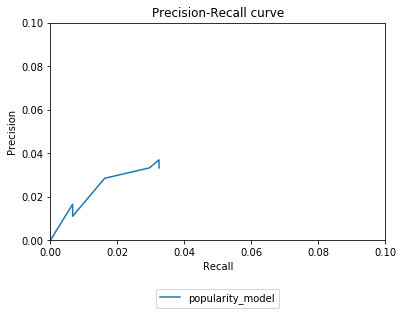

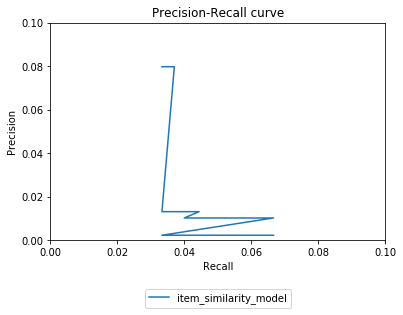

In [61]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model")
plot_precision_recall(ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")
